In my last blog I discussed Joining datasets in Python Pandas. Today I am going to looking at visualisations in Pandas.

I will focus on using Pandas to create visualisations but will also touch on other libraries.

Visualising your date is key as it is hard to get meaning from a table of data. As they say "a picture is worth a thousand words."

Also once your dataset gets big there is really no other way to get a true sense of the data without aggregation, which loses detail.

### Lets make some data

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0,100,size=(100, 3)), columns=list('ABC'))
df2 = pd.DataFrame(np.random.choice(a=['A', 'B', 'C', 'D'],size=(100,2)), columns=list('DE'))
# join df and df2
df3 = pd.concat([df,df2], axis=1)
df3

,A,B,C,D,E
0,21,46,37,A,D
1,31,15,7,D,C
2,29,60,4,B,A
3,74,68,7,C,D
4,30,76,63,D,A
...,...,...,...,...,...
95,35,72,17,B,B
96,6,0,30,C,A
97,92,85,8,C,D
98,80,77,47,C,A


### df.plot

The most basic plot, using the plot() method with no parameters, in pandas gives you a line chart, using all continuous data series in the dataframe.

<AxesSubplot:>

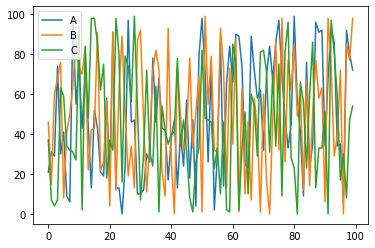

In [3]:
df3.plot()

We can use some parameters to change things up

#### Selecting the type of chart using kind=

Options include:- 

‘line’ : line plot (default)

‘bar’ : vertical bar plot

‘barh’ : horizontal bar plot

‘hist’ : histogram

‘box’ : boxplot

‘kde’ : Kernel Density Estimation plot

‘density’ : same as ‘kde’

‘area’ : area plot

‘pie’ : pie plot

‘scatter’ : scatter plot (DataFrame only)

‘hexbin’ : hexbin plot (DataFrame only)

### Scatter

<AxesSubplot:xlabel='A', ylabel='B'>

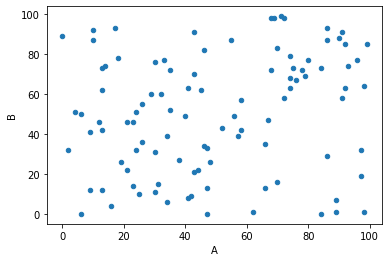

In [4]:
df3.plot(kind='scatter', x='A', y='B')

### Bar chart

<AxesSubplot:xlabel='D'>

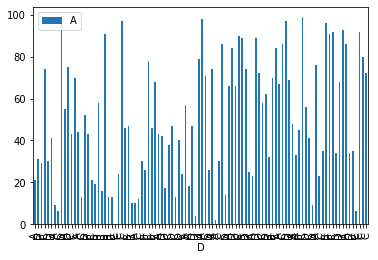

In [5]:
df3.plot(kind='bar', x='D', y='A')

### Histogram

<AxesSubplot:ylabel='Frequency'>

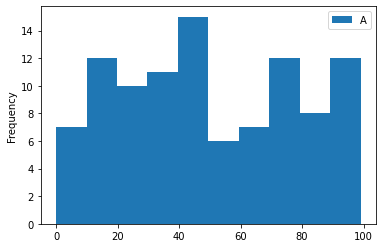

In [6]:
df3.plot(kind='hist', y='A')

### Box plot

<AxesSubplot:>

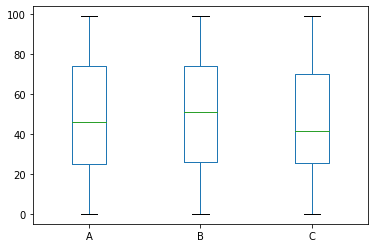

In [7]:
df3.plot(kind='box')

Other attributes of the plot() function that will be useful include:-
- title
- figsize
- xticks / yticks

There are many many more which are powered by Matplotlib.

#### Lets try figsize, but we will sort the data by column A first.


<AxesSubplot:>

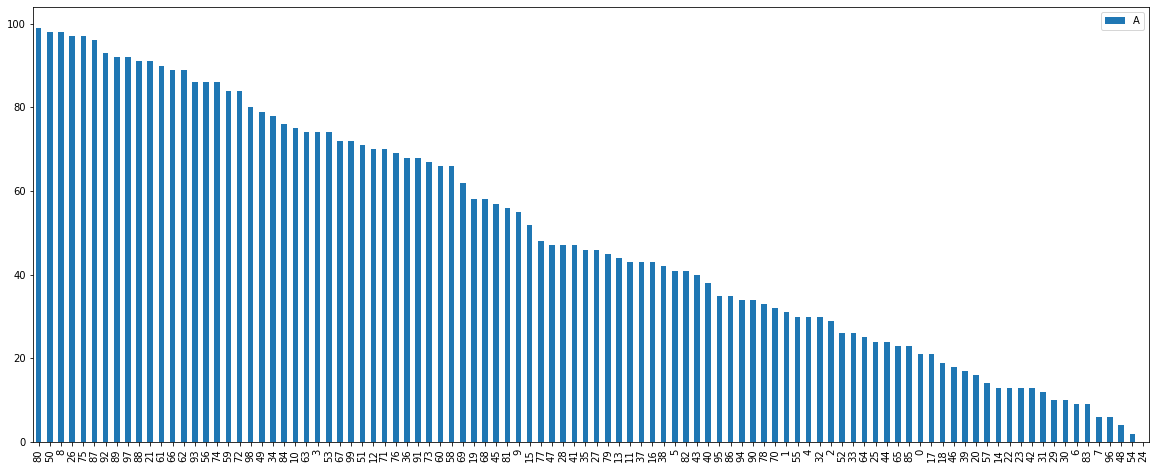

In [8]:
df4 = df3.sort_values('A', ascending=False)
df4.plot(kind='bar', use_index=True, y='A', figsize=(20,8))

### Lets add a title

<AxesSubplot:title={'center':'Some random data'}>

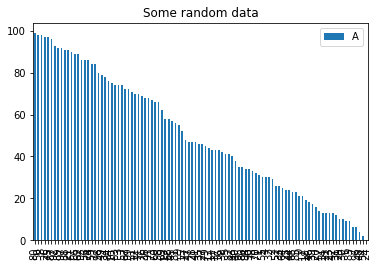

In [9]:
df4.plot(kind='bar', use_index=True, y='A', title='Some random data')

### Getting correlations for a datasets

It can be helpful to look at what what correlation you have within a dataset, this can be done with using a little Matplotlib.

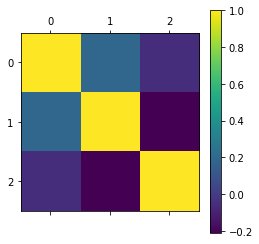

In [17]:
import matplotlib.pyplot as plt

plt.matshow(df4.corr())
cb = plt.colorbar()
plt.show()

# Change visualisation engine backend in Pandas


So the standard visualisation engine in Pandas is powered by Matplotlib, it does the job but there are better plotting engines these days. One options that has been in Pandas since v0.25 is the ability to change the engine.

You can set the backend for the whole session as follows:

**pd.options.plotting.backend = 'plotly'**

Or for just one plot like this:

**df.plot(backend='plotly')**


These are the available plotting backends that I know of:

- matplotlib
- hvplot >= 0.5.1
- holoviews
- pandas_bokeh
- plotly >= 4.8
- altair

Lets try using the plotly library as the engine

In [11]:
df3.plot(backend='plotly', kind='hist', y='A')

# Other visualisations library's

A few years ago there were limited options for visualisations in Python really Matplotlib was your only option. Matplotlib dates back to 2003 and was designed to be similar to MatLab a scientific platform.

R and ggplot set a standard the Matplotlib struggled to compete. ggplot used the so called Grammar of Graphics and offered animation and less verbose syntax.

All that has changed now and there are a number of great libraries that outperform Matplotlib. Some of these new libraries offer interactivity.

Each library has its own syntax which you need to learn, but it should not take long as many are designed to be easy to pickup.

Lets have a quick look at plotly my current favourite.

### Bar plot in plotly

In [12]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2]) # x=df3['D'], y=df3['A'])
fig

### Scatter plot in plotly

Lets use the data from the df3 dataframe.

In [13]:
fig = px.scatter(x=df3['A'], y=df3['B'])
fig

### Boxplot in plotly

In [14]:
fig = px.box(x=df3['A'], y=df3['E'])
fig

### Correlations matrix

In [21]:
data = [[1, 20, 30], [20, 1, 60], [30, 60, 1]]

px.imshow(data)


Right that is all for today. If you want to learn more about plotly this is a good starting point https://plotly.com/python/basic-charts/

Other Python visulations libraries that are worth looking at:
- Seaborn
- Plotly
- Geoplotlib
- Gleam
- Plotnine(ggplot)
- Bokeh
- Missingo
- Altair
- Folium
- Leather
- pygal
- Folium

